In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = {
    'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'B', 'C'], 
    'Age': [25, np.nan, 28, 22, 500, 30, np.nan, 28],  
    'Salary': [30000, 40000, np.nan, 25000, 1000000, 32000, 40000, np.nan] 
}

df = pd.DataFrame(data)
print("Messy Data:")
print(df)


Messy Data:
  Name    Age     Salary
0    A   25.0    30000.0
1    B    NaN    40000.0
2    C   28.0        NaN
3    D   22.0    25000.0
4    E  500.0  1000000.0
5    F   30.0    32000.0
6    B    NaN    40000.0
7    C   28.0        NaN


In [3]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Name      0
Age       2
Salary    2
dtype: int64


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) #mean of salary column in place of NAN value
df 

,Name,Age,Salary
0,A,25.0,30000.0
1,B,105.5,40000.0
2,C,28.0,NaN
3,D,22.0,25000.0
4,E,500.0,1000000.0
5,F,30.0,32000.0
6,B,105.5,40000.0
7,C,28.0,NaN


In [5]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median()) #median in salary column
df

,Name,Age,Salary
0,A,25.0,30000.0
1,B,105.5,40000.0
2,C,28.0,36000.0
3,D,22.0,25000.0
4,E,500.0,1000000.0
5,F,30.0,32000.0
6,B,105.5,40000.0
7,C,28.0,36000.0


In [6]:
print("\nDuplicates:", df.duplicated().sum()) #name- B and C


Duplicates: 2


In [7]:
df=df.drop_duplicates()
df  #No B and C in new DF bcz of duplications

,Name,Age,Salary
0,A,25.0,30000.0
1,B,105.5,40000.0
2,C,28.0,36000.0
3,D,22.0,25000.0
4,E,500.0,1000000.0
5,F,30.0,32000.0


#***Detect & Handle Outliers***

In [8]:
#IQR method

In [9]:
Q1 = df[['Age','Salary']].quantile(0.35)
Q3 = df[['Age','Salary']].quantile(0.65)
IQR = Q3 - Q1

In [10]:
outliers = ((df[['Age','Salary']] < (Q1 - 1.5 * IQR)) | 
            (df[['Age','Salary']] > (Q3 + 1.5 * IQR)))

In [11]:
print("\nOutliers detected:\n", outliers)


Outliers detected:
      Age  Salary
0  False   False
1   True   False
2  False   False
3  False   False
4   True    True
5  False   False


In [12]:
#REMOVING ROWS WITH OUTLINERS
df_clean = df[~outliers.any(axis=1)]
df_clean

,Name,Age,Salary
0,A,25.0,30000.0
2,C,28.0,36000.0
3,D,22.0,25000.0
5,F,30.0,32000.0


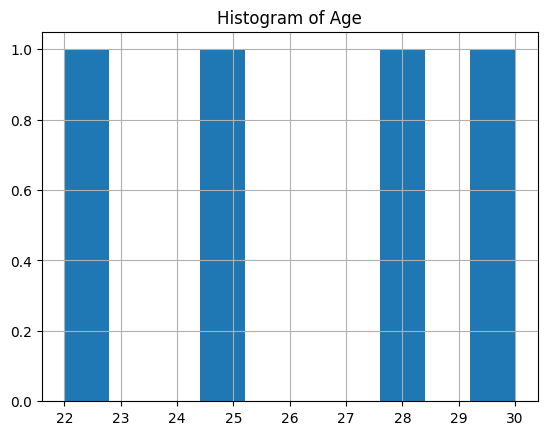

In [13]:
#Histogram
df_clean['Age'].hist(bins=10)
plt.title("Histogram of Age")
plt.show()

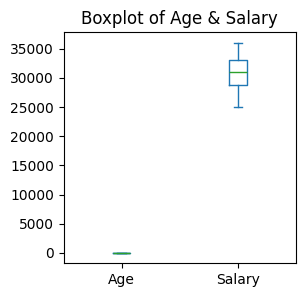

In [14]:
df_clean[['Age','Salary']].plot(kind='box', figsize=(3,3)) #boxplot
plt.title("Boxplot of Age & Salary")
plt.show()

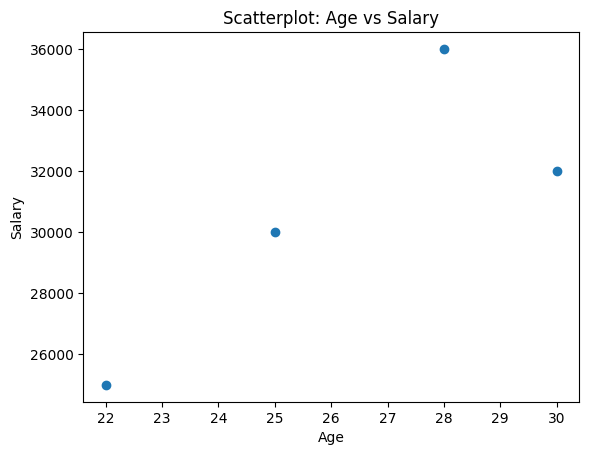

In [15]:
#Scater Graph
plt.scatter(df_clean['Age'], df_clean['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatterplot: Age vs Salary")
plt.show()